In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("hr_data.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# no nas 
df.columns[df.isna().any()].tolist()

[]

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [10]:
df["Attrition"].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [11]:
237/1233

0.1922141119221411

C:\Users\anush\AppData\Local\Temp\ipykernel_14836\2291966748.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\anush\AppData\Local\Temp\ipykernel_14836\2291966748.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\anush\AppData\Local\Temp\ipykernel_14836\2291966748.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\anush\AppData\Local\Temp\ipykernel_14836\2291966748.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotat

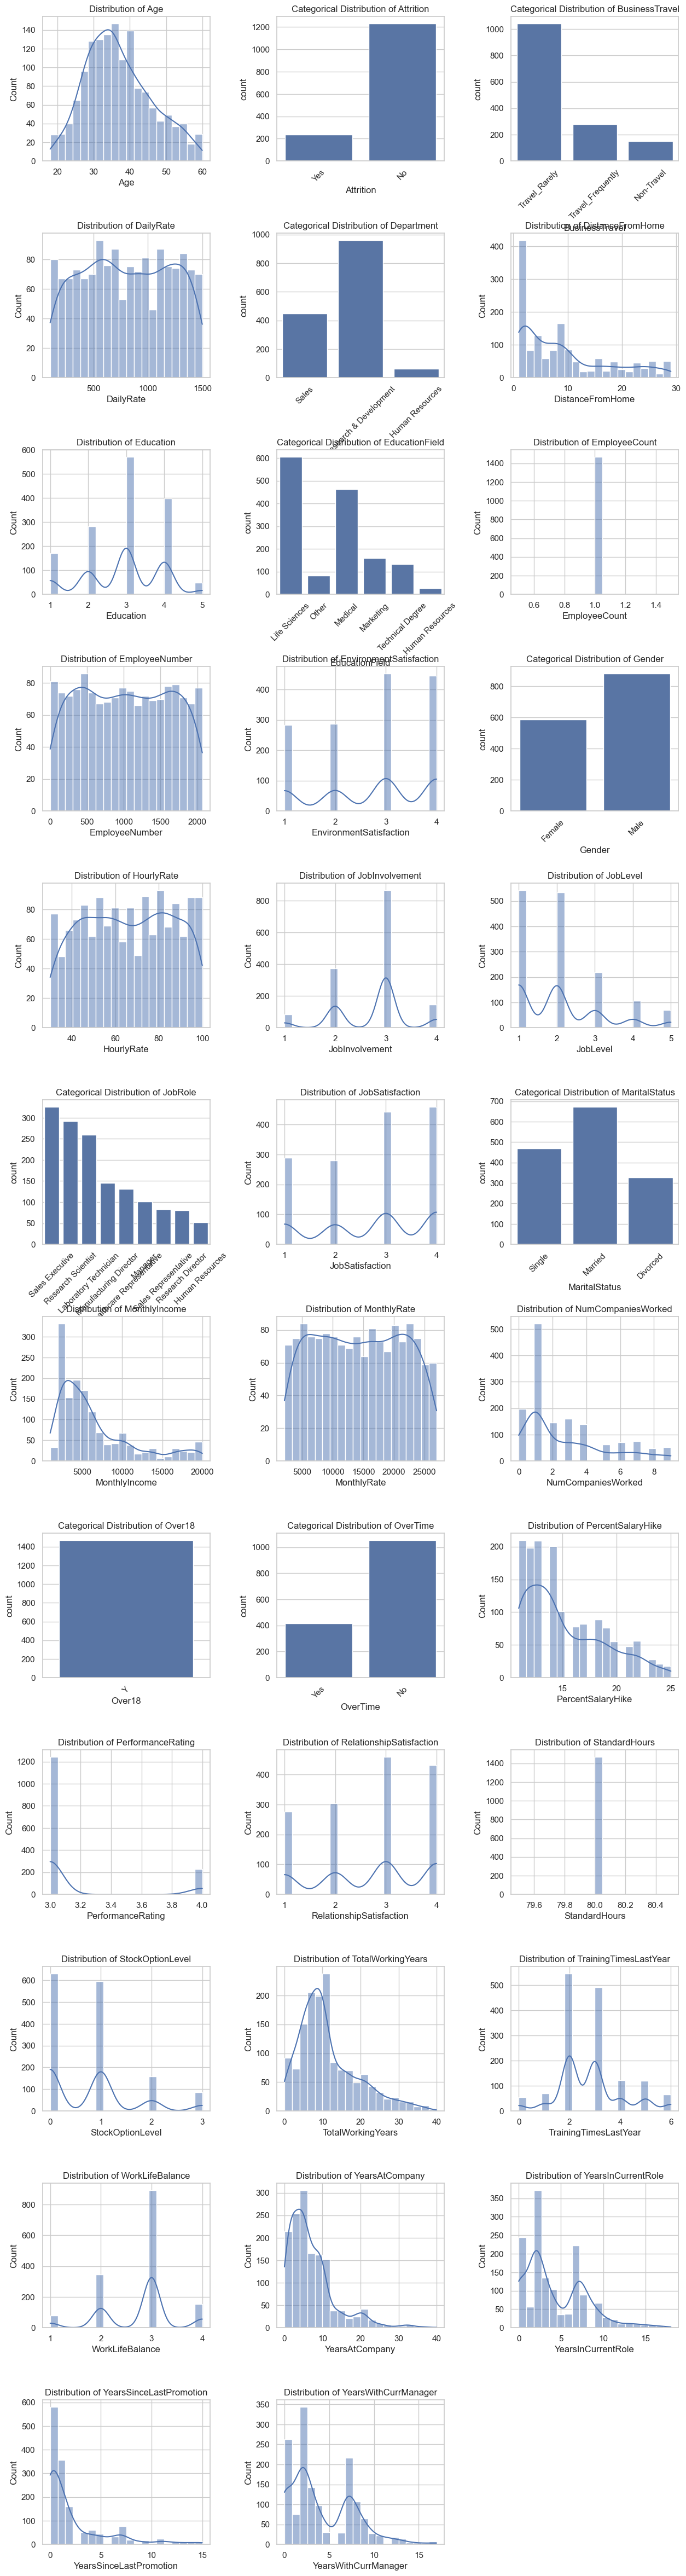

In [18]:
# Define the number of columns for the subplot grid (3 columns)
ncols = 3
nrows = (len(df.columns) + ncols - 1) // ncols  # Ensure enough rows to fit all columns

# Create subplots with specified number of rows and columns
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through all columns and plot their distributions
for i, column in enumerate(df.columns):
    ax = axes[i]
    
    if df[column].dtype == 'object' or df[column].dtype.name == 'category':  # Categorical columns
        sns.countplot(x=df[column], ax=ax)  # Bar plot for categorical data
        ax.set_title(f'Categorical Distribution of {column}')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    else:  # Numerical columns
        sns.histplot(df[column], kde=True, bins=20, ax=ax)  # Histogram for numerical data
        ax.set_title(f'Distribution of {column}')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.5, wspace=0.4)

plt.show()

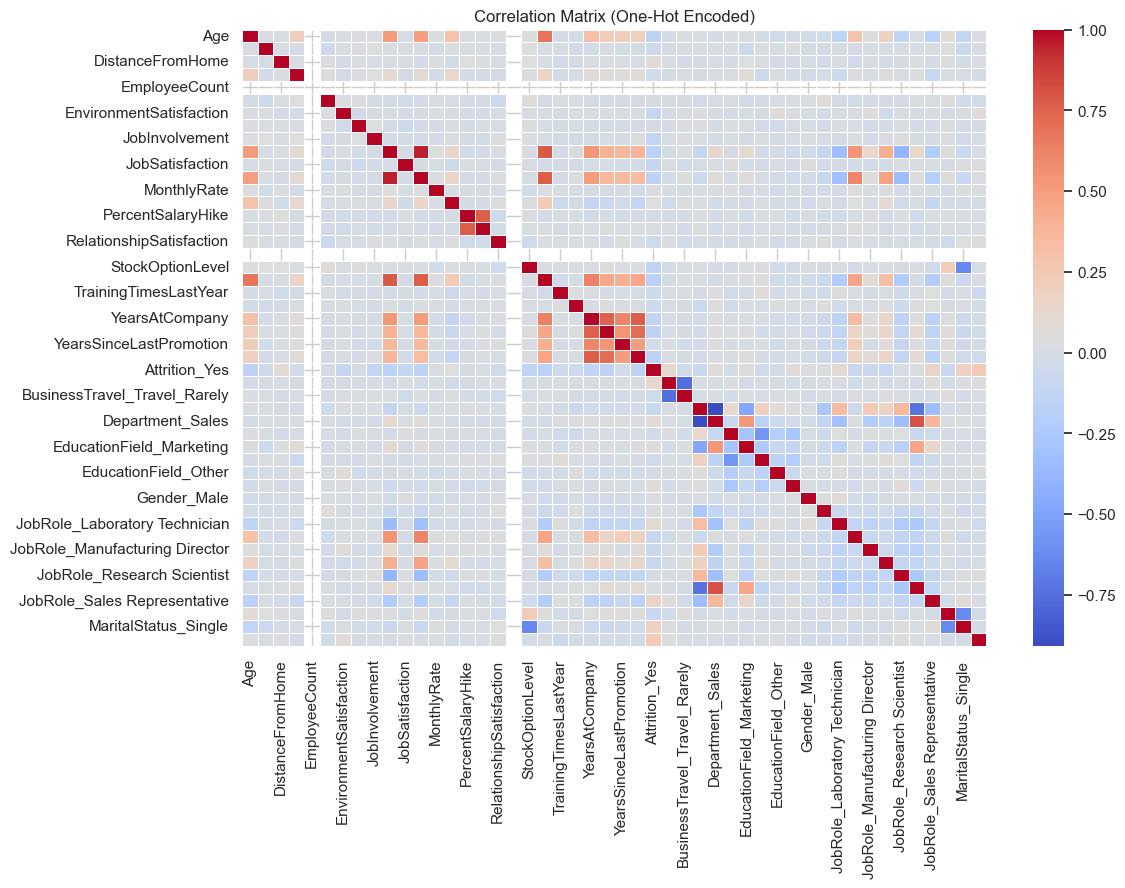

In [21]:
# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (One-Hot Encoded)')
plt.show()

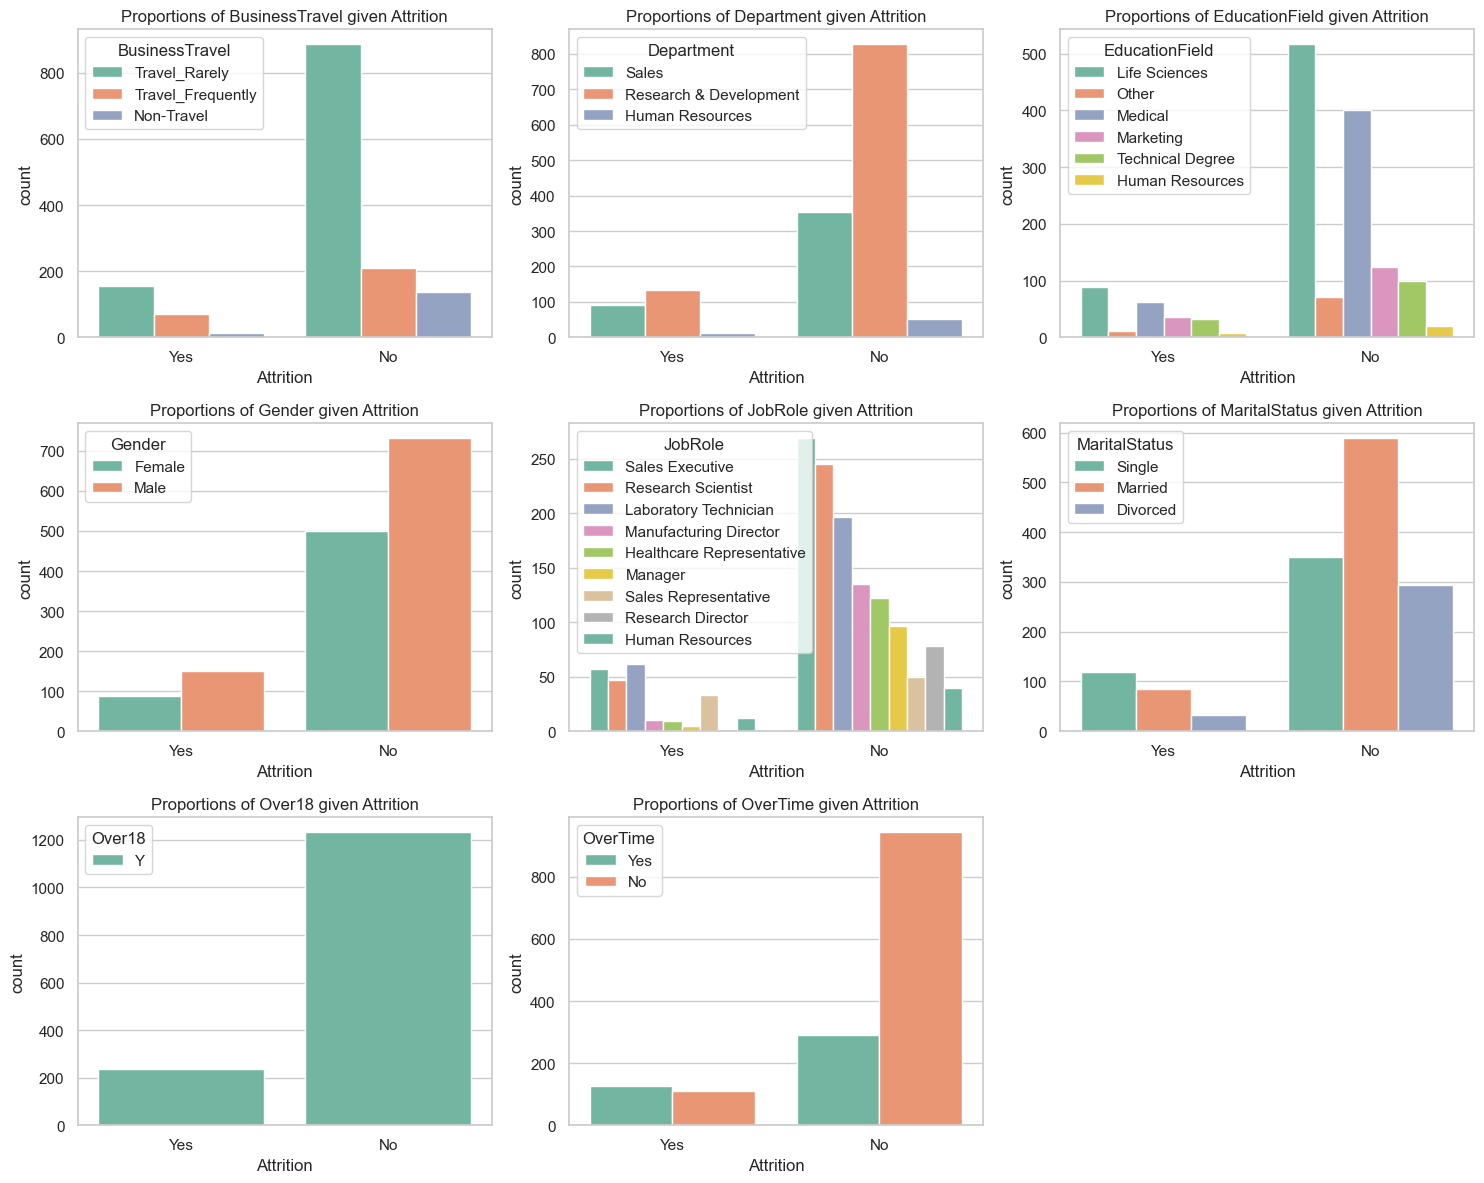

In [ ]:
# List of categorical columns excluding the target variable (Attrition)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Remove the target variable from the list of categorical columns if it's there
categorical_columns.remove('Attrition')

# Create a figure to hold the plots
plt.figure(figsize=(15, 12))

# Loop through all categorical variables and plot
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns) // 3 + 1, 3, i)  # Adjust the grid size for subplots
    
    # Plot the barplot for each categorical variable grouped by Attrition
    sns.countplot(data=df, x='Attrition', hue=column, palette='Set2', ax=plt.gca())

    # Set the title for each subplot
    plt.title(f'Proportions of {column} given Attrition')
    
    # Rotate x-axis labels for better readability if necessary
    plt.xticks(rotation=0)
    
# Adjust layout and spacing between subplots
plt.tight_layout()
plt.show()


C:\Users\anush\AppData\Local\Temp\ipykernel_14836\1370127189.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=column, palette='Set2')
C:\Users\anush\AppData\Local\Temp\ipykernel_14836\1370127189.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=column, palette='Set2')
C:\Users\anush\AppData\Local\Temp\ipykernel_14836\1370127189.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=column, palette='Set2')
C:\Users\anush\AppData\Local\Temp\ipykernel_14836\13701

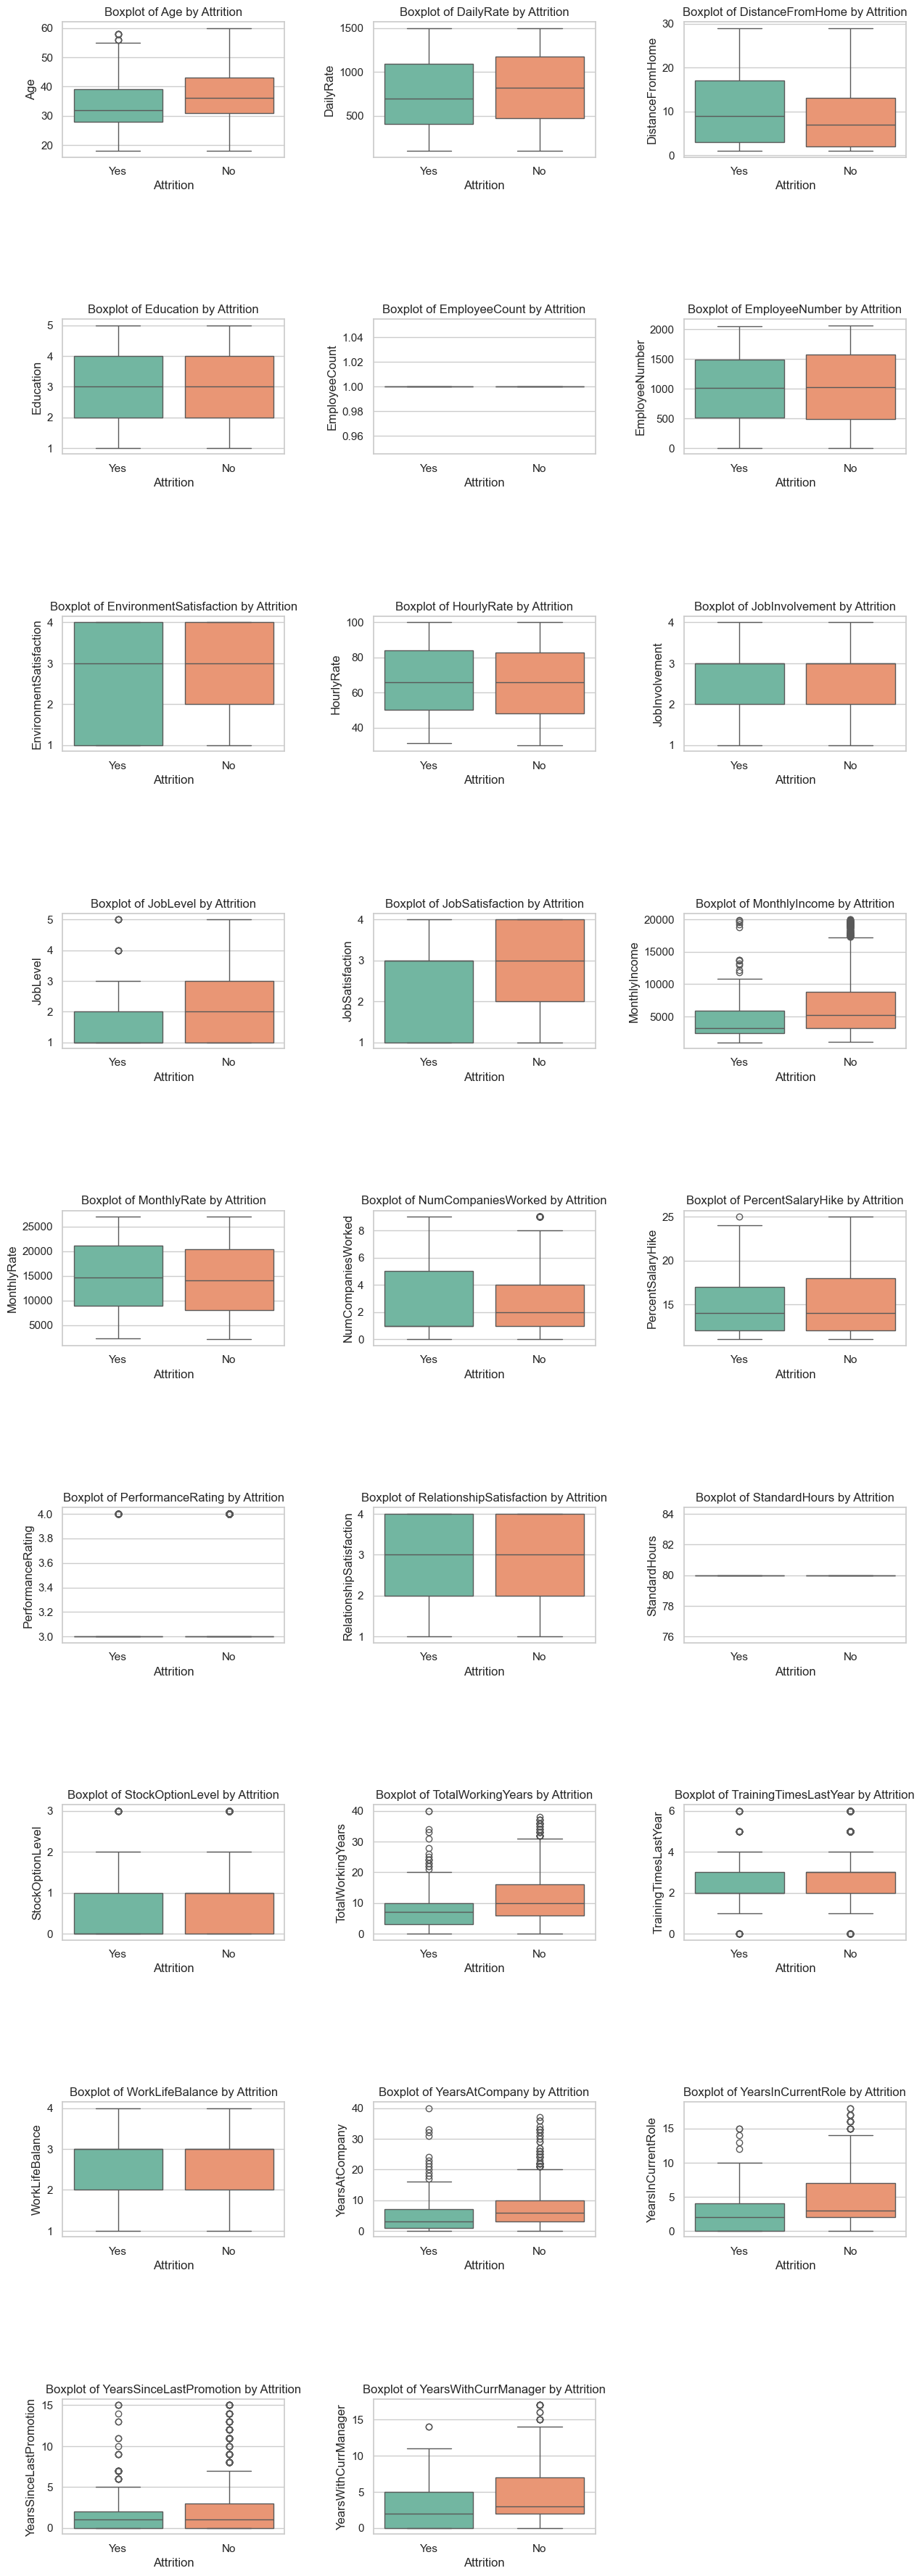

In [30]:
# Select only the numerical columns (int64)
numerical_columns = df.select_dtypes(include=['int64']).columns.tolist()

# Calculate the number of rows for subplots based on the number of numerical columns
nrows = (len(numerical_columns) + 2) // 3  # This ensures enough rows for the plots

# Create a larger figure to hold the boxplots
plt.figure(figsize=(15, 5 * nrows))  # Adjusting the height of the figure based on number of rows

# Loop through all numerical columns and plot boxplots
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(nrows, 3, i)  # Adjust the grid size for subplots
    
    # Plot the boxplot for each numerical variable grouped by Attrition
    sns.boxplot(data=df, x='Attrition', y=column, palette='Set2')

    # Set the title for each subplot
    plt.title(f'Boxplot of {column} by Attrition')
    
    # Rotate x-axis labels if needed (optional)
    plt.xticks(rotation=0)

# Adjust layout and spacing between subplots
plt.subplots_adjust(hspace=1.2, wspace=0.4)  # Increased vertical spacing (hspace) to 1.2 for more room
plt.show()
